In [ ]:
import numpy as np

In [ ]:
data = np.array([[2, 10],
                 [2, 5],
                 [8, 4],
                 [5, 8],
                 [7, 5],
                 [6, 4],
                 [1, 2],
                 [4, 9]])

In [ ]:
centroids = np.array([[2, 10],
                      [5, 8],
                      [1, 2]])

In [ ]:
distance_matrix=np.zeros((len(data),len(centroids)))

In [ ]:
for i in range(len(data)):
  for j in range(len(centroids)):
    distance_matrix[i,j]=np.linalg.norm(data[i]-centroids[j])

In [ ]:
distance_matrix

array([[0.        , 3.60555128, 8.06225775],
       [5.        , 4.24264069, 3.16227766],
       [8.48528137, 5.        , 7.28010989],
       [3.60555128, 0.        , 7.21110255],
       [7.07106781, 3.60555128, 6.70820393],
       [7.21110255, 4.12310563, 5.38516481],
       [8.06225775, 7.21110255, 0.        ],
       [2.23606798, 1.41421356, 7.61577311]])

In [ ]:
k=3
mit=100

for i in range(mit):
  labels=np.argmin(np.linalg.norm(data[:,None]-centroids,axis=2),axis=1)

  new_centroids=np.array([data[labels==i].mean(axis=0) for i in range(k)])\

  if np.all(centroids==new_centroids):
    break
  centroids=new_centroids

print(centroids)
print(labels)

[[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
[0 2 1 0 1 1 2 0]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df=pd.DataFrame(data)

In [ ]:
df.columns=['x','y']

In [ ]:
df

,x,y
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


In [ ]:
df['cluster']=labels

In [ ]:
df

,x,y,cluster
0,2,10,0
1,2,5,2
2,8,4,1
3,5,8,0
4,7,5,1
5,6,4,1
6,1,2,2
7,4,9,0


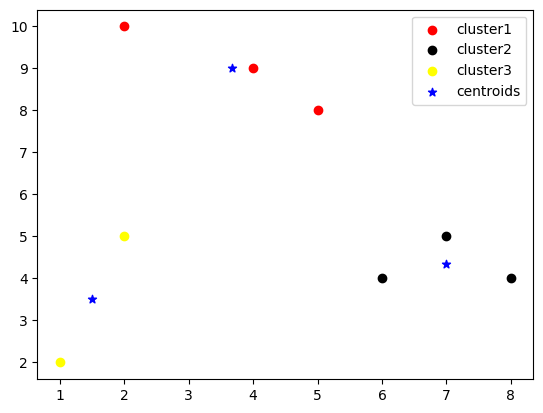

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['x'],df1['y'],label='cluster1',color='red')
plt.scatter(df2['x'],df2['y'],label='cluster2',color='black')
plt.scatter(df3['x'],df3['y'],label='cluster3',color='yellow')
plt.scatter(centroids[:,0],centroids[:,1],label='centroids',marker='*',color='blue')
plt.legend()